#### **Importing Lib & Data**

In [ ]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score,
    calinski_harabasz_score, adjusted_mutual_info_score, adjusted_rand_score
)



nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:

dataset_path = '/content/Final_students_data.csv'
Maindf = pd.read_csv(dataset_path)


# Getting Bios from the data
bios = Maindf['Bio'].fillna('').tolist()


#### **Task1**

In [ ]:

# Preprocess the bios
stopwords_set = set(nltk.corpus.stopwords.words('english'))
processed_bios = []
for bio in bios:
    words = nltk.word_tokenize(bio.lower())
    processed_bio = ' '.join(word for word in words if word.isalnum() and word not in stopwords_set)
    processed_bios.append(processed_bio)


# making the tfidf vector
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_bios)

# the queries that we will test on
queries = [
    "Python for data science & AI",
    "cybersecurity certifications",
    "AI club mentor",
    "volunteer teacher for data analysis",
    "software development life cycle and JavaScript"
]

# To process every query
for query in queries:
    print("\nQuery: ", query, "\n", '-' * 20)

    # prreprocess in the iteration query
    words = nltk.word_tokenize(query.lower())
    preprocessed_query = ' '.join(word for word in words if word.isalnum() and word not in stopwords_set)

    # calculating cosine similarity
    query_vector = tfidf_vectorizer.transform([preprocessed_query])
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # selecting the best 5 queires
    top_indices = np.argsort(similarity_scores)[::-1][:5] # Returns the indices that would sort an array.
    top_bios = []
    for i in top_indices:
        if similarity_scores[i] > 0:  # Only include if similarity is greater than 0
            top_bios.append((Maindf.iloc[i]['Name'], Maindf.iloc[i]['Bio'], similarity_scores[i]))

    # showing results
    if top_bios:
        print("Best matching bios:\n")
        for rank, (name, bio, score) in enumerate(top_bios, start=1):
            print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")

    else:
        print("No related bios.\n")


NameError: name 'nltk' is not defined

#### **Task2**

In [ ]:
#new  function for preprocessing the text
def preprocessing_text(text):
  stopwords_set = set(nltk.corpus.stopwords.words('english'))
  words = nltk.word_tokenize(text.lower())
  return ' '.join(word for word in words if word.isalnum() and word not in stopwords_set)

# preprocessing all of the bios
processed_bios = [preprocessing_text(bio) for bio in bios]

# making the tfidf vector
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_bios)

# new function for ranking bios according to the query
def rank_bios(query):
  preprocessed_query = preprocessing_text(query)
  query_vector = tfidf_vectorizer.transform([preprocessed_query])

  # calculating cosine similarity
  similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()

  # sor the results according to the similarity score
  sorted_indices = np.argsort(similarity_scores)[::-1] #Returns the indices that would sort an array.
  sorted_scores = similarity_scores[sorted_indices]

  # The strategy, which is identifing the largest gap in the similaritty score to filter between relevant results
  gaps = np.diff(sorted_scores)
  if len(gaps) > 0:
    largest_gap_index = np.argmax(gaps) # Returns the indices of the maximum values.
    relevant_cutoff = largest_gap_index + 1
    relevant_indices = sorted_indices[:relevant_cutoff]
  else:
    relevant_indices = []

  # getting relevant bios
  top_bios = [(Maindf.iloc[i]['Name'], Maindf.iloc[i]['Bio'], similarity_scores[i])
              for i in relevant_indices if similarity_scores[i] > 0]

  return top_bios


query = input("Enter the query please: ")
print("\nQuery: ", query, "\n", '-' * 20)

ranked_bios = rank_bios(query)
if ranked_bios:
  print("Best matching bios:\n")
  for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
    print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
  print("No related bios.\n")

NameError: name 'bios' is not defined

Test Cases


In [ ]:
Test_Case1 = 'I am passionate about data science and machine learning'
ranked_bios = rank_bios(Test_Case1)
if ranked_bios:
    print("Best matching bios::\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

Best matching bios::

1. Reem Fathi (Score: 0.53)
Reem is a second-year Data Science student at Princess Sumaya University for Technology, interested in machine learning. She is part of the Data Science Ambassadors and wants to become a Machine Learning Engineer.

2. Hala Fathi (Score: 0.52)
Hala is a third-year Data Science student at Princess Sumaya University for Technology and leads the Data Science Society. She is passionate about machine learning and aims to become a Data Scientist, using AI for problem-solving in healthcare.

3. Adnan Qadri (Score: 0.51)
Adnan is a second-year Data Science student at Jordan University of Science & Technology and serves as a Data Science Ambassador. He is focused on machine learning algorithms and aims to become a Machine Learning Engineer.

4. Hassan Youssef (Score: 0.50)
Hassan, a second-year Data Science student at the University of Jordan, is passionate about applying machine learning algorithms to solve complex data problems. He is involved 

In [ ]:
Test_Case2 = 'I enjoy working on artificial intelligence projects'
ranked_bios = rank_bios(Test_Case2)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

In [ ]:
Test_Case3 = 'I love painting and sketching in my free time'
ranked_bios = rank_bios(Test_Case3)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

Best matching bios:

1. Fadi Saba (Score: 0.31)
Fadi, a second-year student at Al Hussein Technical University, is passionate about predictive modeling and machine learning. He spends his free time as an AI Research Assistant and aspires to leverage AI to tackle real-world problems as a Machine Learning Engineer.

2. Ziad Taha (Score: 0.16)
Ziad, a second-year Data Science and AI student at Jordan University of Science & Technology, combines his love for data with a dedication to volunteering. He has participated in numerous projects using R and Python and is focused on using data to solve real-world problems as a future Data Scientist.

3. Laila Mansour (Score: 0.12)
Laila has always been fascinated by the patterns data reveals. Now a sophomore in Data Science and AI at Al Hussein Technical University, she spends her time analyzing datasets and volunteering as an AI Club mentor. Her goal is to make impactful contributions as a Data Scientist, blending her academic insights with real-w

In [ ]:
Test_Case4 = 'What are the interests of students in the field of computer science?'
ranked_bios = rank_bios(Test_Case4)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

Best matching bios:

1. Saja Masri (Score: 0.26)
Saja, a Computer Science student at the University of Jordan, is a certified full-stack developer. She mentors new students in programming and aspires to be a Software Developer, specializing in front-end and back-end development.

2. Yousef Talal (Score: 0.23)
Yousef is a second-year Computer Science student at Princess Sumaya University for Technology and a certified web developer. He mentors students in tech skills and plans to be a Software Engineer, developing scalable web applications.

3. Rania Hani (Score: 0.22)
Rania, a sophomore at Princess Sumaya University for Technology, is an avid learner in the field of computer science. She has completed a certification in Data Structures and Algorithms and volunteers as a tech support member. Rania is focused on becoming a Software Developer, with a strong interest in problem-solving and optimization.

4. Sami Jamal (Score: 0.19)
Sami, a third-year Cyber Security student, is already work

In [ ]:
Test_Case5 = 'DATA SCIENCE and machine learning'
ranked_bios = rank_bios(Test_Case5)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

Best matching bios:

1. Reem Fathi (Score: 0.64)
Reem is a second-year Data Science student at Princess Sumaya University for Technology, interested in machine learning. She is part of the Data Science Ambassadors and wants to become a Machine Learning Engineer.

2. Adnan Qadri (Score: 0.62)
Adnan is a second-year Data Science student at Jordan University of Science & Technology and serves as a Data Science Ambassador. He is focused on machine learning algorithms and aims to become a Machine Learning Engineer.

3. Mona Khaled (Score: 0.57)
Mona is a second-year Data Science student at Petra University. She is a member of the Data Science Society and aims to become a Machine Learning Engineer.

4. Rami Zubair (Score: 0.56)
Rami, a senior at Petra University, has a strong foundation in data science and machine learning. As an AI research assistant, he explores cutting-edge AI applications and plans to use his knowledge to build machine learning models as a Machine Learning Engineer.

5. 

In [ ]:
Test_Case6 = 'I love programming! Do you?'
ranked_bios = rank_bios(Test_Case6)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

Best matching bios:

1. Ziad Taha (Score: 0.21)
Ziad, a second-year Data Science and AI student at Jordan University of Science & Technology, combines his love for data with a dedication to volunteering. He has participated in numerous projects using R and Python and is focused on using data to solve real-world problems as a future Data Scientist.

2. Saja Masri (Score: 0.19)
Saja, a Computer Science student at the University of Jordan, is a certified full-stack developer. She mentors new students in programming and aspires to be a Software Developer, specializing in front-end and back-end development.

3. Yasmin Khoury (Score: 0.15)
Yasmin is a first-year student at Princess Sumaya University for Technology, where she is honing her skills in programming and data science. She loves helping her peers as a mentor and aims to become a Software Developer, focusing on developing efficient applications for real-world problems.

4. Ali Faris (Score: 0.13)
Ali is a second-year Computer Science

In [ ]:
Test_Case7 = 'Python and data analysis projects'
ranked_bios = rank_bios(Test_Case7)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

In [ ]:
Test_Case8 = 'Deep learning in healthcare applications'
ranked_bios = rank_bios(Test_Case8)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

In [ ]:
Test_Case9 = 'Experience in Python with 5+ years'
ranked_bios = rank_bios(Test_Case9)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

Best matching bios:

1. Joud Zayed (Score: 0.19)
Joud's interest in Cyber Security began with a fascination for ethical hacking and has grown through hands-on experience. As a third-year student at the University of Jordan, she holds a CEH certification and is involved in cybersecurity awareness campaigns, aiming for a future as a Cybersecurity Analyst.

2. Omar Al-Hassan (Score: 0.17)
A forth-year student at Princess Sumaya University for Technology, Omar is a rising star in Cyber Security. His hands-on experience with security systems and competition involvement showcases his skill set. Omar is also certified in CompTIA Security+, and he aspires to protect organizations from cyber threats as a Cybersecurity Analyst.

3. Nadine Khalil (Score: 0.17)
Nadine is a Cyber Security student at the University of Jordan, where she has already earned her CompTIA Security+ certification. She works as an intern in a Security Operations Center, gaining valuable experience. Nadine aspires to become 

In [ ]:
Test_Case10 = 'Machine learning for predictive analytics'
ranked_bios = rank_bios(Test_Case10)
if ranked_bios:
    print("Best matching bios:\n")
    for rank, (name, bio, score) in enumerate(ranked_bios, start=1):
      print(f"{rank}. {name} (Score: {score:.2f})\n{bio}\n")
else:
    print("No related bios.\n")

Best matching bios:

1. Kareem Bassam (Score: 0.62)
Kareem, a senior Data Science student at Al Hussein Technical University, focuses on machine learning for predictive analytics. He is part of an AI research group and aspires to be a Machine Learning Engineer, developing algorithms for predictive models.

2. Mohammad Fawaz (Score: 0.51)
Mohammad is a senior at Princess Sumaya University for Technology, specializing in machine learning and data science. He assists in AI research projects and is working on developing machine learning models. Mohammad aims to work as a Machine Learning Engineer, improving predictive analytics in the healthcare industry.

3. Omar Mansour (Score: 0.49)
Omar is a senior at Petra University who is focused on advanced analytics and machine learning. As a research assistant, he explores ways to turn data into actionable insights. Omar aims to become a Data Scientist, with a particular interest in machine learning models and predictive analytics.

4. Hassan You

#### **Task3**

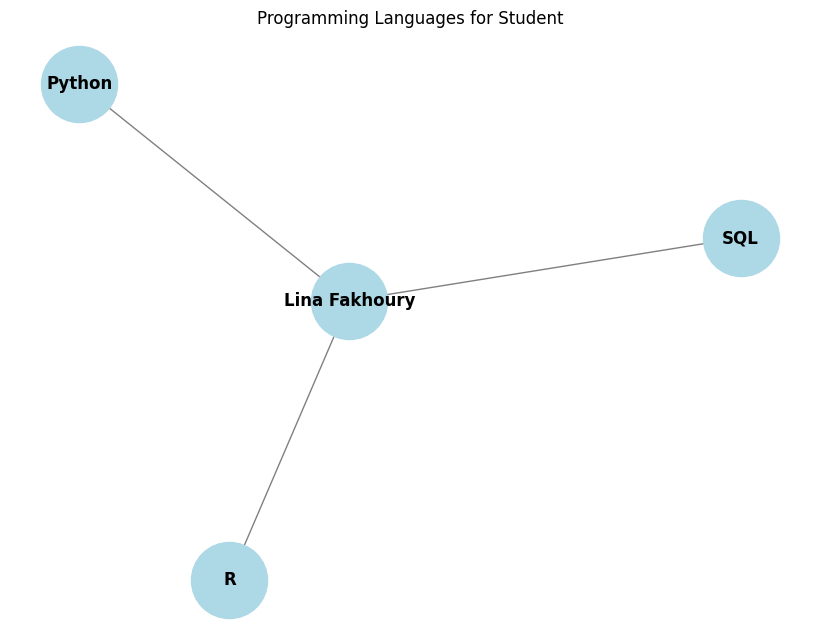

In [ ]:
student_name = "Lina Fakhoury"

student_row = Maindf[Maindf['Name'].str.contains(student_name, case=False, na=False)]

# checking if the student's name exists
if student_row.empty:
    print("This name does not exsit")
else:
    # getting student's name and programming languages
    student_name = student_row.iloc[0]['Name']
    programming_languages = student_row.iloc[0]['Programming Languages']


    languages = [lang.strip() for lang in programming_languages.split(';')]  # Split languages and remove ; and spaces


    G = nx.Graph()
    G.add_node(student_name)
    for lang in languages:
        G.add_node(lang)
        G.add_edge(student_name, lang)


    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=101)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', edge_color='gray')
    plt.title("Programming Languages for Student")
    plt.show()

#### **Task4**

Enter certificate name: machine learning


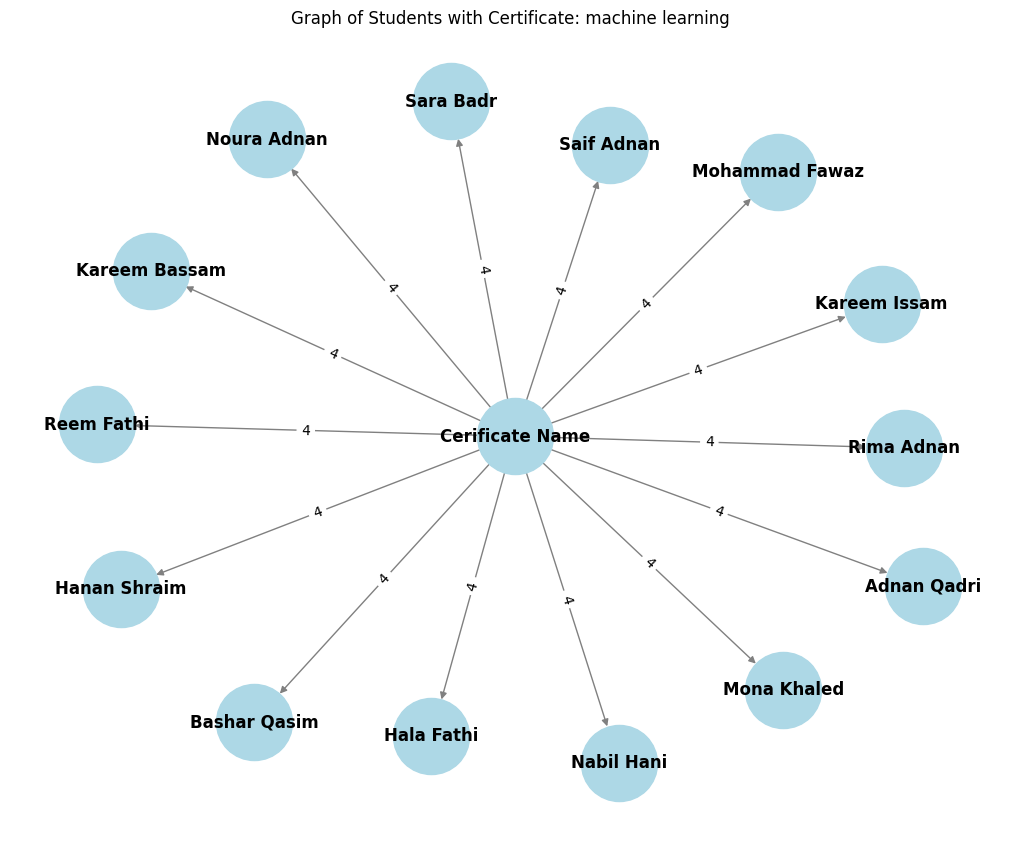

In [ ]:
certificate_name = input("Enter certificate name: ")
certificate_name1 = 'Cerificate Name'
# getting students with the same certificate
certificate_students = Maindf[Maindf['Certifications'].str.contains(certificate_name, case=False)]

# cchecking if students exsit
if certificate_students.empty:
  print("There is no students for this certificate")
else:
  # Making the graph
  G = nx.DiGraph()
  G.add_node(certificate_name1)

  # to go through the student's data
  for _, row in certificate_students.iterrows():
    student_name = row['Name']
    num_projects = row['Project Count']

    # adding the student as node and link it with the certificate node with weight of project counts
    G.add_node(student_name)
    G.add_edge(certificate_name1, student_name, projects=num_projects)

  # Drawing the graph
  plt.figure(figsize=(10, 8))
  pos = nx.spring_layout(G, seed=101)
  nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', edge_color='gray')
  edge_labels = nx.get_edge_attributes(G, 'projects')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
  plt.title(f"Graph of Students with Certificate: {certificate_name}")
  plt.show()

#### **Task 5 & 6**

In [ ]:
Maindf.head()

,Name,Year,Programming Languages,Certifications,Project Count,Extracurricular Activities,Career Interest,Bio,Cluster
0,Laila Mansour,2,Python; R; SQL,Data Science Professional Certificate (IBM),4,AI Club Mentor,Data Scientist,Laila has always been fascinated by the patter...,1
1,Omar Al-Hassan,4,Java; C++; HTML,CompTIA Security+,5,Cybersecurity Competition Participant,Cybersecurity Analyst,A forth-year student at Princess Sumaya Univer...,2
2,Rania Khoury,1,C; Python; JavaScript,Java Programming (Oracle),3,Peer Programming Tutor,Software Developer,Rania entered the University of Jordan's Compu...,0
3,Khaled Abbas,2,SQL; Python; R,Data Science Professional Certificate (IBM),4,Volunteer Tutor,Data Scientist,Khaled has a knack for translating data into m...,1
4,Nour Husseini,3,Python; Java; SQL,CEH,5,Tech Community Member,Cybersecurity Analyst,"In her Third year at Petra University, Nour is...",2


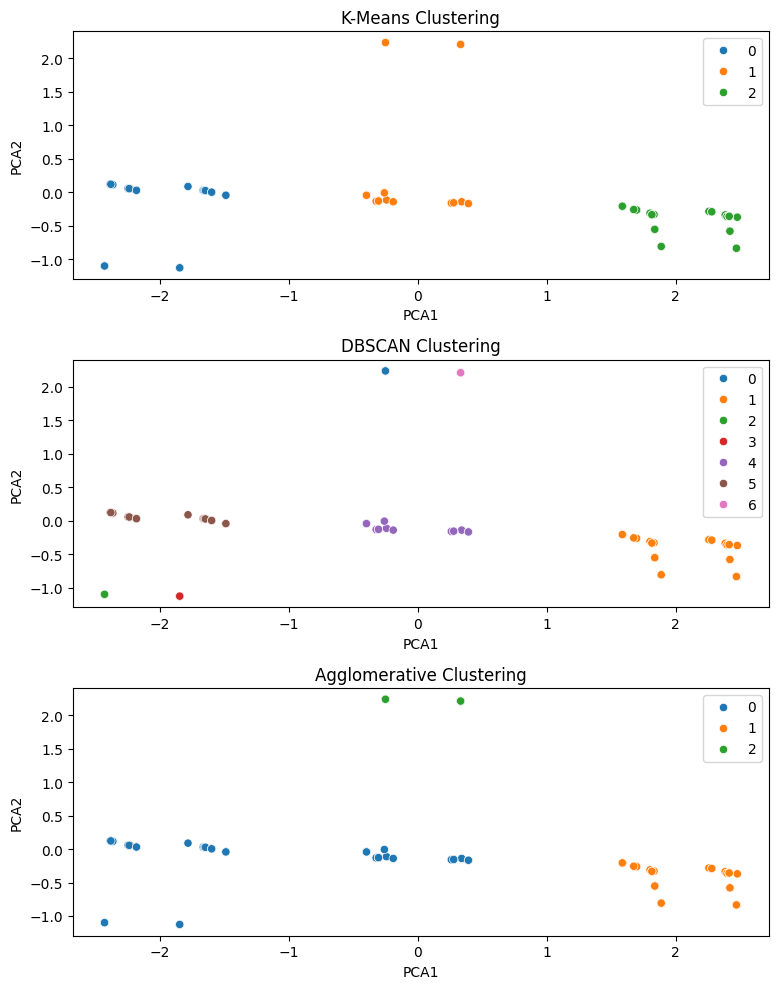

,Model,Dimensionality Reduction,Silhouette Score,DB Index,CH Index,AMI,ARI
0,K-Means,PCA,0.650999,0.685197,6.117259e+02,1.000000,1.000000
1,K-Means,LDA,1.000000,0.000000,8.348364e+59,1.000000,1.000000
2,DBSCAN,PCA,0.848930,0.245422,2.022191e+03,0.753124,0.636254
3,DBSCAN,LDA,1.000000,0.000000,8.348364e+59,1.000000,1.000000
4,Agglomerative,PCA,0.706029,0.430954,6.728009e+02,0.733119,0.625312
5,Agglomerative,LDA,1.000000,0.000000,8.348364e+59,1.000000,1.000000


In [ ]:
# encoding the career intrest column using one hot encoding
students_data_encoded = pd.get_dummies(Maindf, columns=['Career Interest'], drop_first=True)

# Select features for clustering
features = ['Year', 'Project Count'] + [col for col in students_data_encoded.columns if 'Career Interest_' in col]
clustering_data = students_data_encoded[features]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Applying PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Applying LDA
if 'Cluster' in Maindf:
    lda = LDA(n_components=2)
    lda_data = lda.fit_transform(scaled_data, Maindf['Cluster'])
else:
    lda_data = None

# Applying clustering algorithms
kmeans_pca = KMeans(n_clusters=3, random_state= 101).fit_predict(pca_data)
kmeans_lda = KMeans(n_clusters=3, random_state= 101).fit_predict(lda_data) if lda_data is not None else None

dbscan_pca = DBSCAN(eps=0.5, min_samples=5).fit_predict(pca_data)
dbscan_lda = DBSCAN(eps=0.5, min_samples=5).fit_predict(lda_data) if lda_data is not None else None

agg_pca = AgglomerativeClustering(n_clusters=3).fit_predict(pca_data)
agg_lda = AgglomerativeClustering(n_clusters=3).fit_predict(lda_data) if lda_data is not None else None

# Evaluate clustering
def evaluate_clustering(data, labels, ground_truth):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        db_index = davies_bouldin_score(data, labels)
        ch_index = calinski_harabasz_score(data, labels)
    else:
        silhouette, db_index, ch_index = None, None, None

    ami = adjusted_mutual_info_score(ground_truth, labels) if ground_truth is not None else None
    ari = adjusted_rand_score(ground_truth, labels) if ground_truth is not None else None

    return silhouette, db_index, ch_index, ami, ari

results = []

# Evaluating every clustering algorithm with the dimetionality reduction technique
for model_name, labels, data, dr in [
    ("K-Means", kmeans_pca, pca_data, "PCA"),
    ("K-Means", kmeans_lda, lda_data, "LDA"),
    ("DBSCAN", dbscan_pca, pca_data, "PCA"),
    ("DBSCAN", dbscan_lda, lda_data, "LDA"),
    ("Agglomerative", agg_pca, pca_data, "PCA"),
    ("Agglomerative", agg_lda, lda_data, "LDA")
]:
    if data is not None and labels is not None:
        silhouette, db_index, ch_index, ami, ari = evaluate_clustering(data, labels, Maindf['Cluster'] if 'Cluster' in Maindf else None)
        results.append({
            "Model": model_name,
            "Dimensionality Reduction": dr,
            "Silhouette Score": silhouette,
            "DB Index": db_index,
            "CH Index": ch_index,
            "AMI": ami,
            "ARI": ari
        })


results_df = pd.DataFrame(results)


models = {  # Definnig models here
    "K-Means": {"PCA": kmeans_pca, "LDA": kmeans_lda},
    "DBSCAN": {"PCA": dbscan_pca, "LDA": dbscan_lda},
    "Agglomerative": {"PCA": agg_pca, "LDA": agg_lda}
}

# Visualize clustering results
plt.figure(figsize=(15, 10))
for i, (name, reductions) in enumerate(models.items(), 1):
    if "PCA" in reductions:
        plt.subplot(3, 2, i * 2 - 1)
        sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=reductions["PCA"], palette='tab10')
        plt.title(f"{name} Clustering")
        plt.xlabel("PCA1")
        plt.ylabel("PCA2")

plt.tight_layout()
plt.show()

results_df

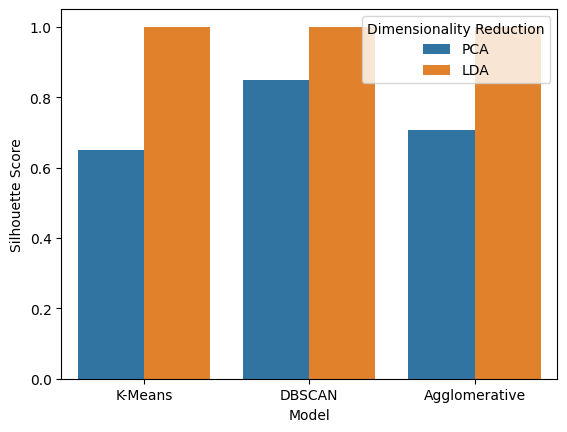

In [ ]:
import seaborn as sns

sns.barplot(data = results_df, x ="Model", y= "Silhouette Score", hue ='Dimensionality Reduction')
plt.show()